# Importing the datasets

In [48]:
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Fetching the data
##  Reading data from the source url

In [17]:
source = urllib.request.urlopen(r'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x02.txt').read()

soup = bs.BeautifulSoup(source, 'lxml')

lines = soup.p.contents[0].split('\n')


## Removing the empty lines from the fetched data

In [44]:
try:
    lines.remove('')
except:
    pass

## Creating the dataset

In [50]:
l1 = []
noOfColumns = 0
noOfRows = 0
for line in lines:
  
    if line[0] == '#':    # avoiding all the lines stating with '#' character
        continue

    if line[0] != '#' and (noOfColumns==0 or noOfRows==0):    # fetching the number of rows and columns
        datalist = line.split(' ')

        if datalist[1] == 'columns':
            noOfColumns = int(datalist[0])
            col = 0

        elif datalist[1] == 'rows':
            noOfRows = int(datalist[0])
            row = 0

    elif line[0] != '#' and noOfColumns>0 and noOfRows>0:    # fetfching all the rows and columns in 1-dimentional array as a list
        datalist = line.strip().split()

        if col<noOfColumns:
            l1.append(' '.join(datalist))
            col += 1

        elif row<noOfRows:
            l1 += datalist
            row += 1
            
dataset = np.array([l1]).reshape((noOfRows+1,noOfColumns))    # Creating the dataset from the of shape(rows, columns) from the 1-D array with the coumns headers


In [51]:
print(dataset)

[['Index' 'Patient Height (inches)' 'Patient Weight (pounds)'
  'Catheter Length (centimeters)']
 ['1' '42.8' '40.0' '37']
 ['2' '63.5' '93.5' '50']
 ['3' '37.5' '35.5' '34']
 ['4' '39.5' '30.0' '36']
 ['5' '45.5' '52.0' '43']
 ['6' '38.5' '17.0' '28']
 ['7' '43.0' '38.5' '37']
 ['8' '22.5' '8.5' '20']
 ['9' '37.0' '33.0' '34']
 ['10' '23.5' '9.5' '30']
 ['11' '33.0' '21.0' '38']
 ['12' '58.0' '79.0' '47']]


# Pre-processing of data

##  creating a pandas dataframe

In [53]:
df = pd.DataFrame(data=dataset[1:,1:],    # selecting all the rows and columns starting from 1st index location i.e. 2nd row and 2nd column as the data
                 index=dataset[1:,0],     # 1st column of the dataset is the index and the rows starting from 1st index location
                 columns=dataset[0,1:],   # ist row of the dataset is the column names it's the 0th row of the dataset
                 dtype = 'float64')

## let's have a look at the dataframe

In [55]:
print(df)

    Patient Height (inches)  Patient Weight (pounds)  \
1                      42.8                     40.0   
2                      63.5                     93.5   
3                      37.5                     35.5   
4                      39.5                     30.0   
5                      45.5                     52.0   
6                      38.5                     17.0   
7                      43.0                     38.5   
8                      22.5                      8.5   
9                      37.0                     33.0   
10                     23.5                      9.5   
11                     33.0                     21.0   
12                     58.0                     79.0   

    Catheter Length (centimeters)  
1                            37.0  
2                            50.0  
3                            34.0  
4                            36.0  
5                            43.0  
6                            28.0  
7                  

## fetching the Independent Variables and Dependent Variable

In [176]:
X = df.iloc[:,:2].values
y = df.iloc[:,2:].values

# <font color='black'> splitting the data into training set and testing set</font> 

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### in the above case we have 2 Independent Variables so in this case the best model to be fit is Multi Linear Regressor
### The equation for the Multi Linear 
     y = b1*x1 + b2*x2

#  Fitting the Multi Linear Regressor to the training set

In [178]:
from sklearn.linear_model import LinearRegression
multi_linear_regressor = LinearRegression()
multi_linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the result of the regression

In [179]:
y_pred = multi_linear_regressor.predict(X_test)

In [180]:
print(y_pred)

[[ 36.51406223]
 [ 47.12559846]
 [ 39.47931735]]


In [181]:
print(y_test)

[[ 37.]
 [ 47.]
 [ 43.]]


In [182]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.750385852234
1.37740629444
4.21570560672


# Visualization of the results 

## Visualizing the training set results

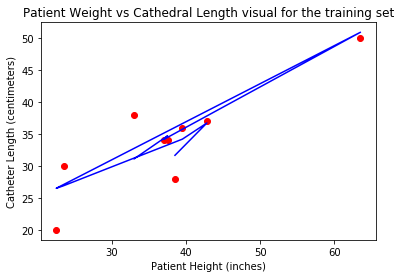

In [183]:
plt.scatter(X_train[:,0], y_train, color='red')
plt.plot(X_train[:,0], multi_linear_regressor.predict(X_train), color='blue')
plt.title('Patient Weight vs Cathedral Length visual for the training set')
plt.xlabel('{0}'.format(df.columns[0]))
plt.ylabel('{0}'.format(df.columns[2]))
plt.show()

## Visualizing the test set results

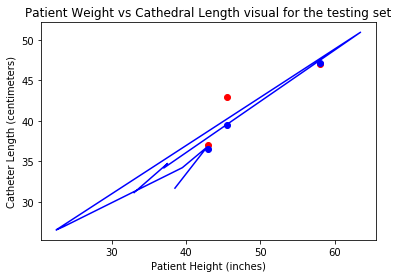

In [186]:
plt.scatter(X_test[:,0], y_test, color='red')
plt.scatter(X_test[:,0], y_pred, color='blue')
plt.plot(X_train[:,0], multi_linear_regressor.predict(X_train), color='blue')
plt.title('Patient Weight vs Cathedral Length visual for the testing set')
plt.xlabel('{0}'.format(df.columns[0]))
plt.ylabel('{0}'.format(df.columns[2]))
plt.show()

#### conclusion: By looking at the y_test and y_pred and calculating metrics of R-Square, mean absolute error and mean absolute square errors the results are pretty awesome but I'm little doubtful about the visualization since i can either show patient height or patient weight on the x axis of the 2D figure.